In [1]:
CODE_REPO_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/analysis/'

import warnings
warnings.filterwarnings('ignore')

from importlib import reload
import sys
import os

import pandas as pd
import scipy as sc
import numpy as np

sys.path.insert(0, CODE_REPO_PATH)
import read_data as rd
import analysis_plot as ap
import pfl3_im as pi
import behaviour as bh

%config InlineBackend.figure_format = 'retina'

In [2]:
DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/data/'
FIGURE_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/Figures/pdf_and_png/'
SOURCE_DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/source_data/'
MODEL_FIT_CSV_PATH = '/YOUR_PATH/Converting_allo_goal_to_ego_steering/model_and_fit_csv/'

save_figure=False
save_source_data=False

### Load recordings

In [ ]:
recs=pi.load_data(DATA_PATH,reprocess=False)

Get continous estimate of goal (used for ED. Fig. 10a)

In [8]:
reload(ap)
ap.get_sliding_mean_vector(recs,60)

### Turning velocity aligned to peaks in R-L transients (Fig. 5c) 

In [9]:
reload(pi)
abf_peaks_df,im_peaks_df = ap.get_peaks_df(recs,12,label="ps_c1_rml_dF/F",
                                            detection_parameters ={
                                            'gaussfilt_s' : 0.2,
                                            'height' : 0.1,
                                            'distance' : 3,
                                            'width' : 1,
                                            'prominence':1,
                                            })

In [10]:
mean_peaks_df = pi.get_mean_peaks_dheading(abf_peaks_df,im_peaks_df)

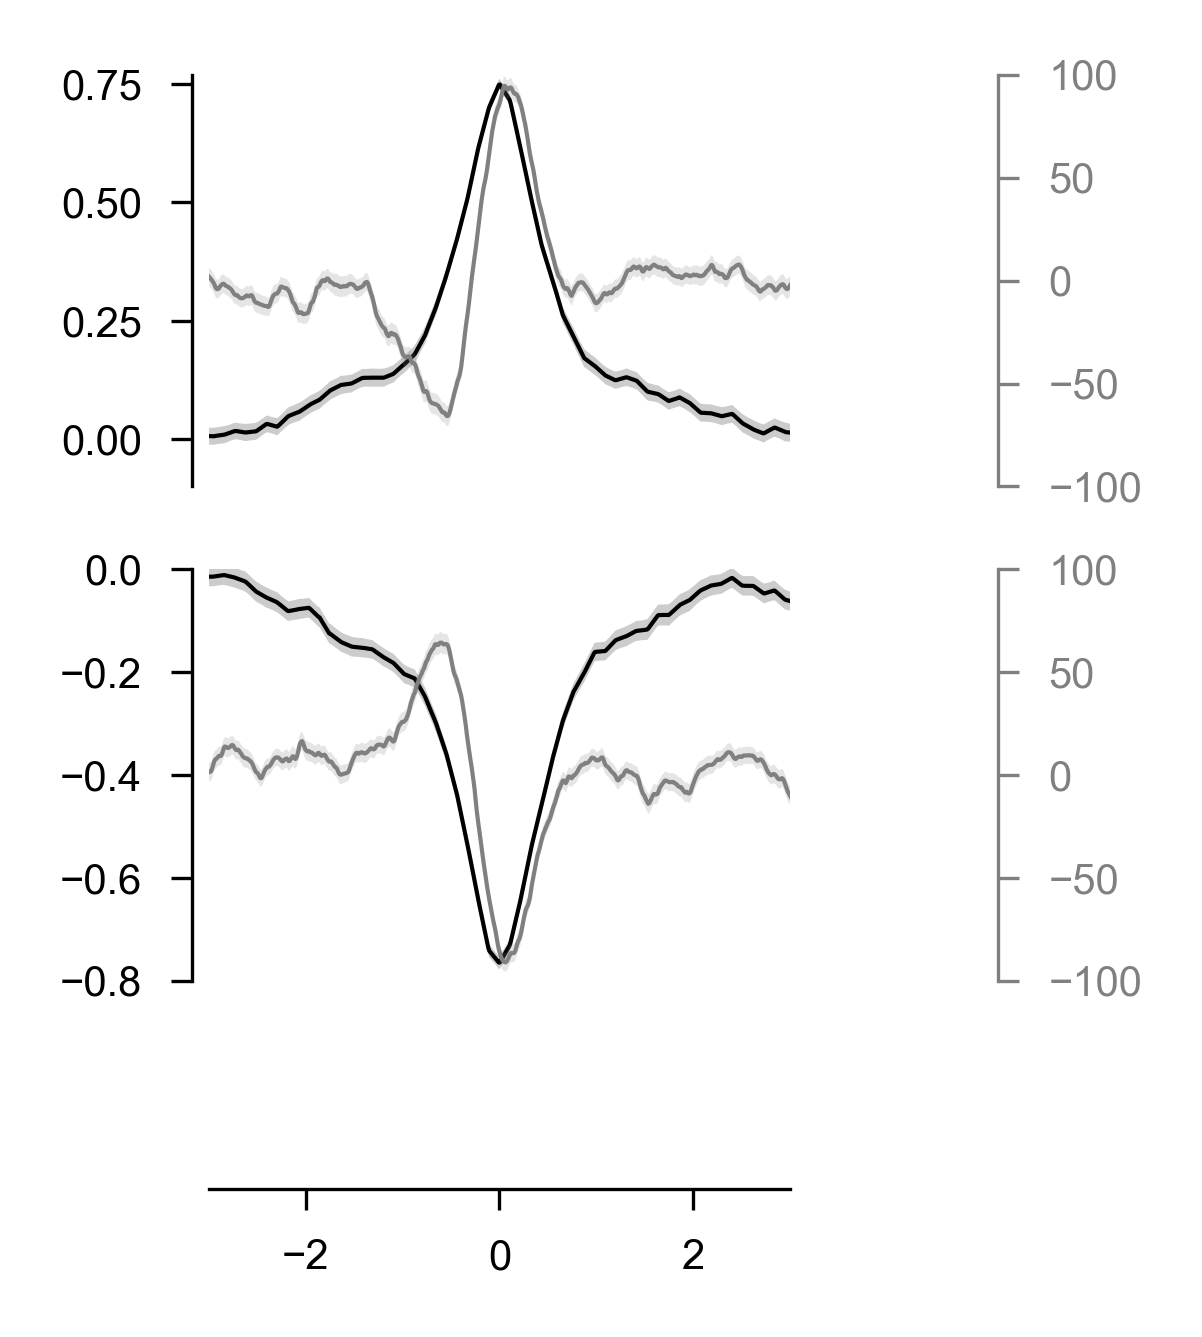

In [11]:
reload(pi)
   
pi.plot_aligned_peaks(mean_peaks_df,
                      rml_ylim_up=[-0.1,0.77],
                      rml_ylim_down = [-0.8,0],
                      turning_ylim=[-100,100],
                      save=save_figure,
                      savepath=FIGURE_PATH,
                     fname='Fig_5c.pdf')

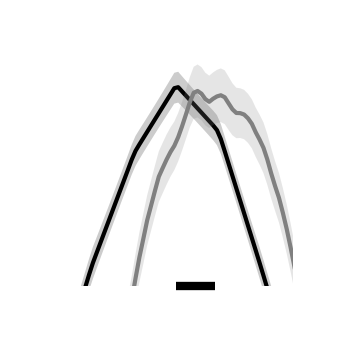

In [12]:
reload(pi)
pi.plot_aligned_peaks_inset_up(mean_peaks_df, 
                      rml_ylim_up=[-0.1,0.77],
                      turning_ylim=[-100,100],
                      save=save_figure,
                      savepath=FIGURE_PATH,
                      fname='Fig_5c_inset_up.pdf')

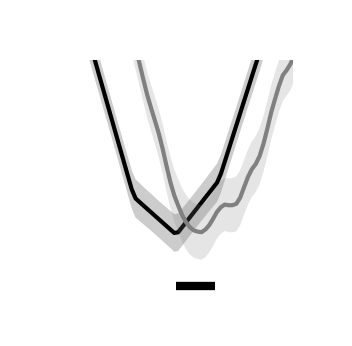

In [13]:
reload(pi)
pi.plot_aligned_peaks_inset_down(mean_peaks_df, 
                      rml_ylim_down = [-0.8,0],
                      turning_ylim=[-100,100], 
                                 save=save_figure,
                      savepath=FIGURE_PATH,
                      fname='Fig_5c_inset_down.pdf')

In [14]:
print(len(im_peaks_df.query('trial_type=="up"')['trial_id'].unique()), 'up peaks')
print(len(im_peaks_df.query('trial_type=="down"')['trial_id'].unique()),'down peaks')

478 up peaks
499 down peaks


### Heading relative to goal aligned to peaks in R-L transients (ED Fig. 10a)

In [15]:
reload(pi)
mean_peaks_df_distance_to_goal = pi.get_mean_peaks_distance_to_goal(abf_peaks_df,im_peaks_df)

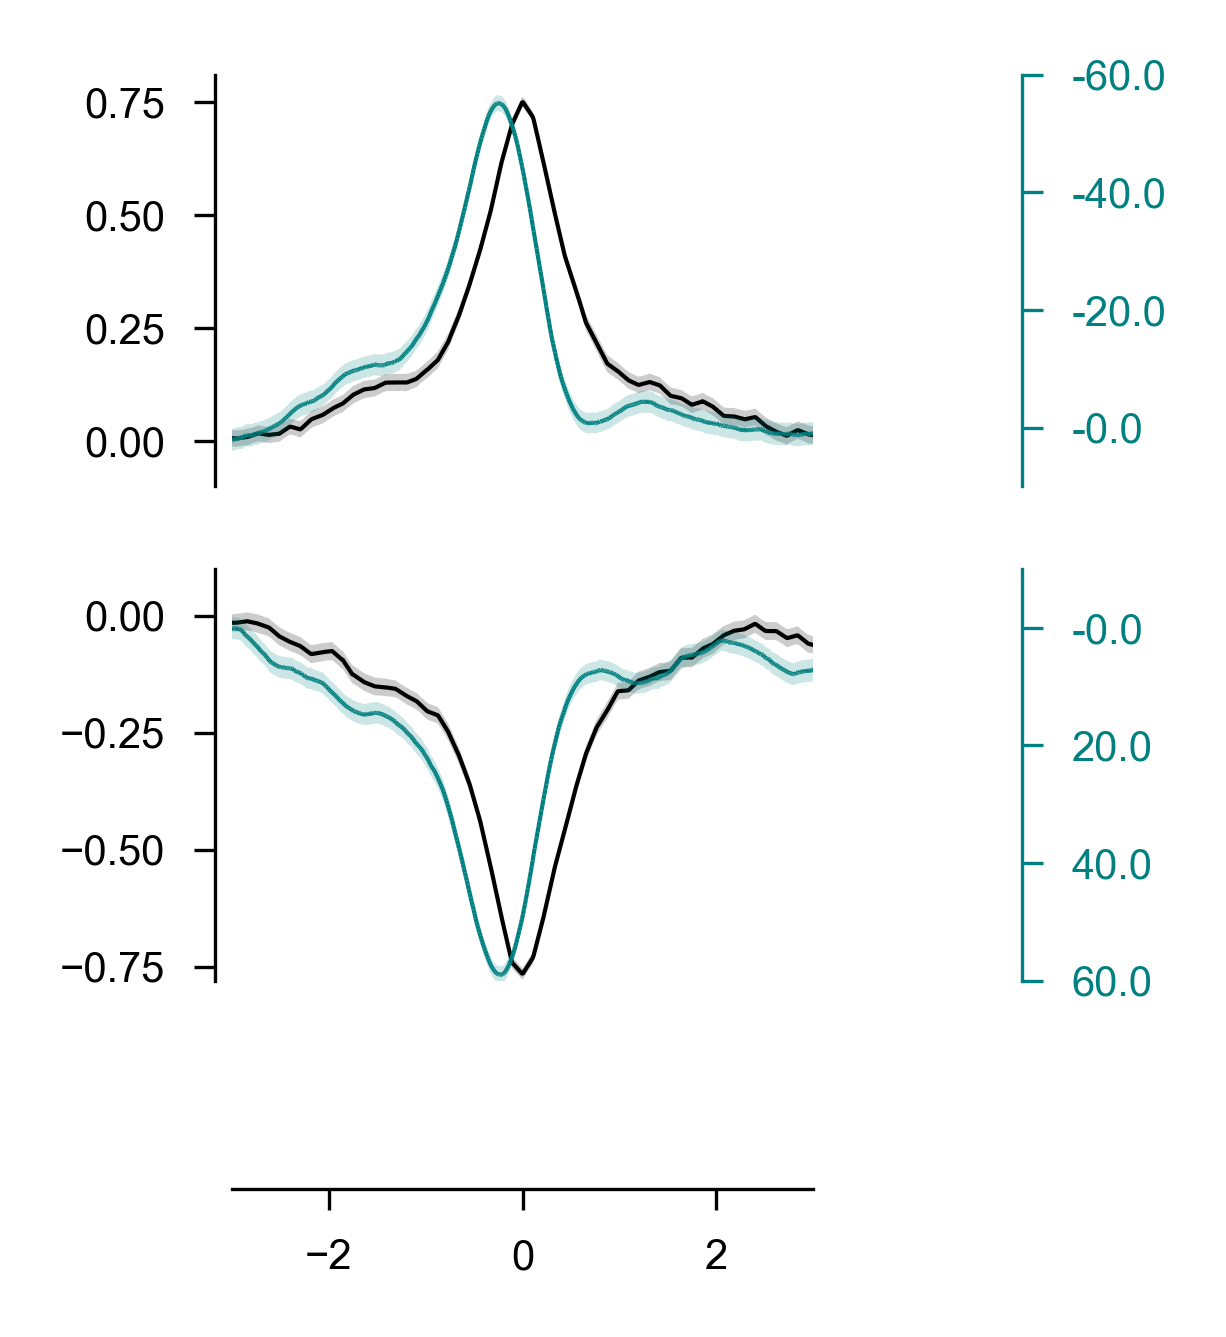

In [16]:
reload(pi)
pi.plot_aligned_peaks_dist(mean_peaks_df_distance_to_goal,
                           rml_ylim_up=[-0.1,0.81],
                           rml_ylim_down = [-0.78,0.1],
                           save=save_figure,
                           savepath=FIGURE_PATH,
                           fname='ED_Fig_10a.pdf')

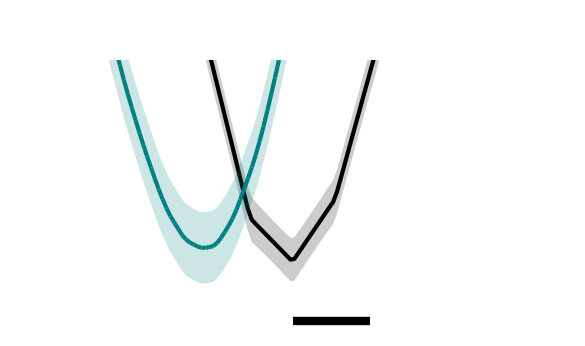

In [17]:
reload(pi)

pi.plot_aligned_peaks_dist_inset_down(mean_peaks_df_distance_to_goal,rml_ylim_down=[-0.78,0.1],
                           save=save_figure,
                           savepath=FIGURE_PATH,
                           fname='ED_Fig_10a_inset_down.pdf')


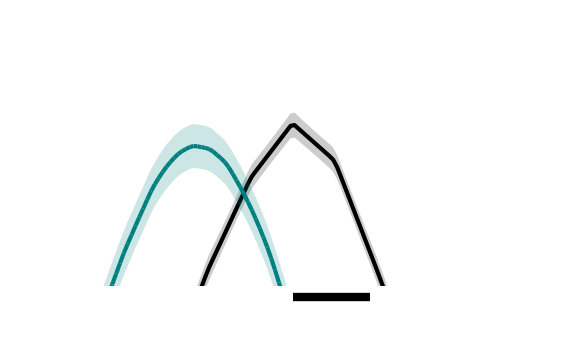

In [18]:
reload(pi)

pi.plot_aligned_peaks_dist_inset_up(mean_peaks_df_distance_to_goal,rml_ylim_up=[-0.1,0.81],
                            save=save_figure,
                           savepath=FIGURE_PATH,
                           fname='ED_Fig_10a_inset_up.pdf')


### Example trace (Fig. 5b)

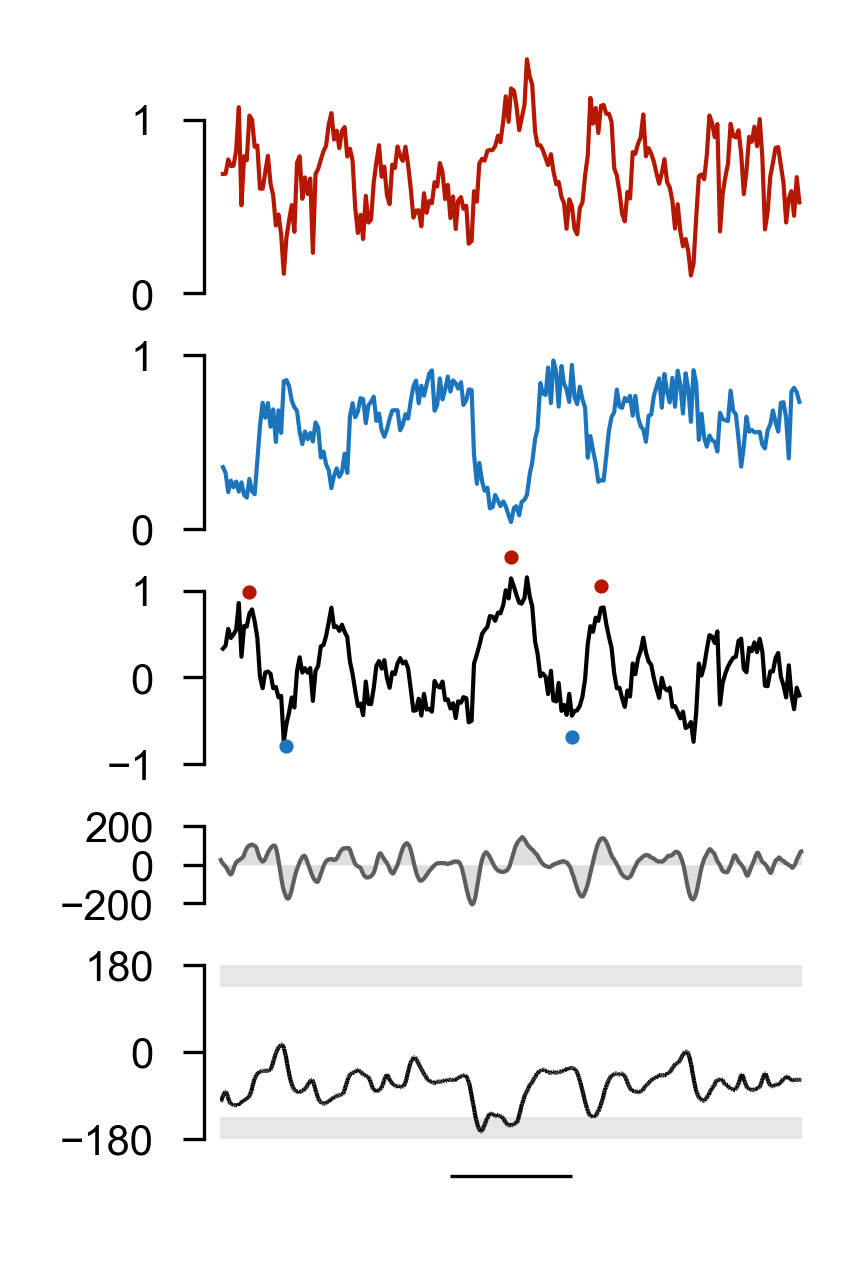

In [19]:
reload(pi)
pi.plot_example_peak(im_peaks_df,
                     abf_peaks_df,trial_id=22,tline_s=5,
                     save=save_figure,
                     savepath=FIGURE_PATH,
                    fname='Fig_5b.pdf')

### Get menotaxis bouts (called fixation bouts here)

In [20]:
reload(ap)
abf_fixation_df,im_fixation_df = abf_fixation_df,im_fixation_df = ap.get_fixation_events_df(recs,
                                                               detection_parameters={'RDP_epsilon':25,
                                                                                     'min_length':200},
                                                               inplace=True,im=True)

### LAL activity vs. distance to goal Fixation events

In [21]:
reload(pi)
im_fixation_df=pi.get_shifted_signals(recs,im_fixation_df)

0.2184002184002184


In [22]:
reload(pi)
lal_mean_df,lal_flies_df = pi.get_lal_vs_distance_to_goal(im_fixation_df,
                                                         save=save_source_data,
                                                         savepath=SOURCE_DATA_PATH,
                                                         fname='Fig_5d.csv')

10 flies


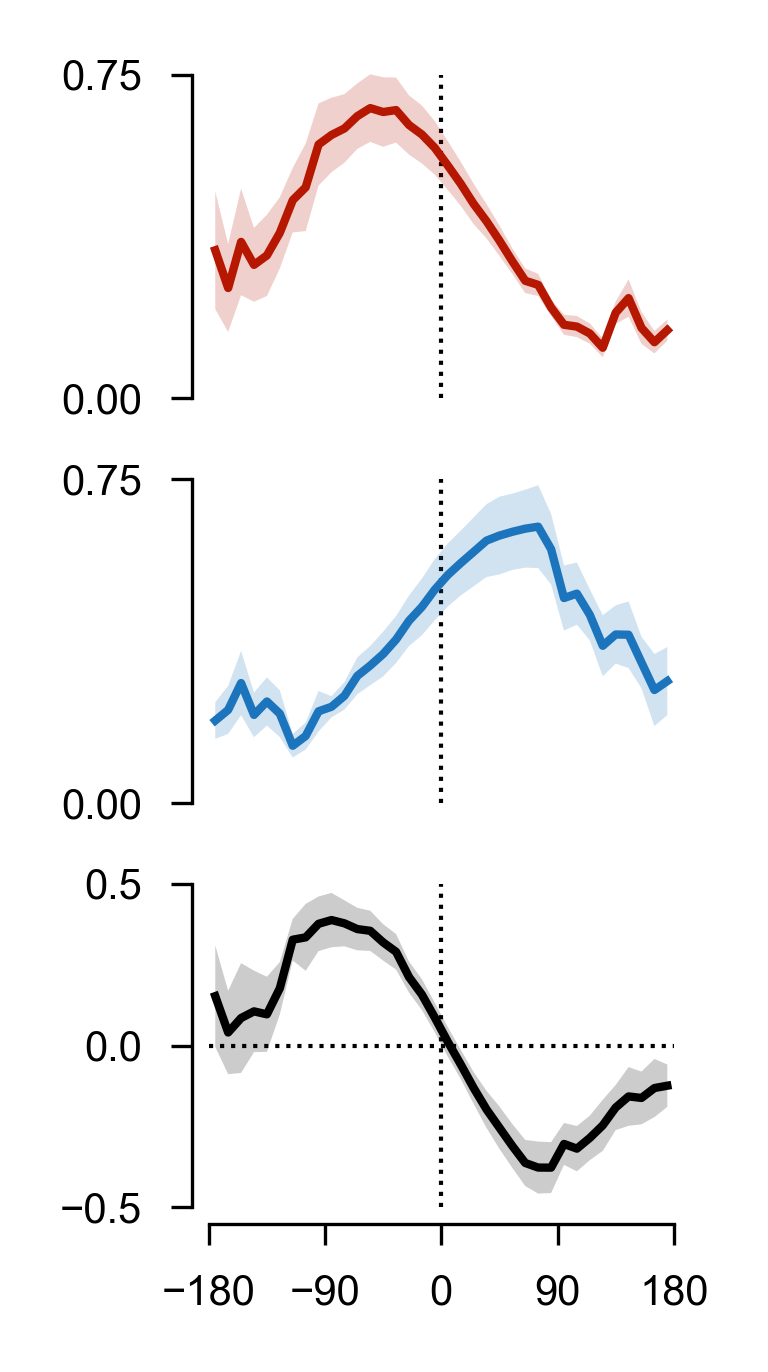

In [23]:
reload(pi)
pi.plot_lal_vs_distance_to_goal(lal_mean_df,lal_flies_df,
                                save=save_figure,
                                savepath=FIGURE_PATH,
                               fname='Fig_5d.pdf')

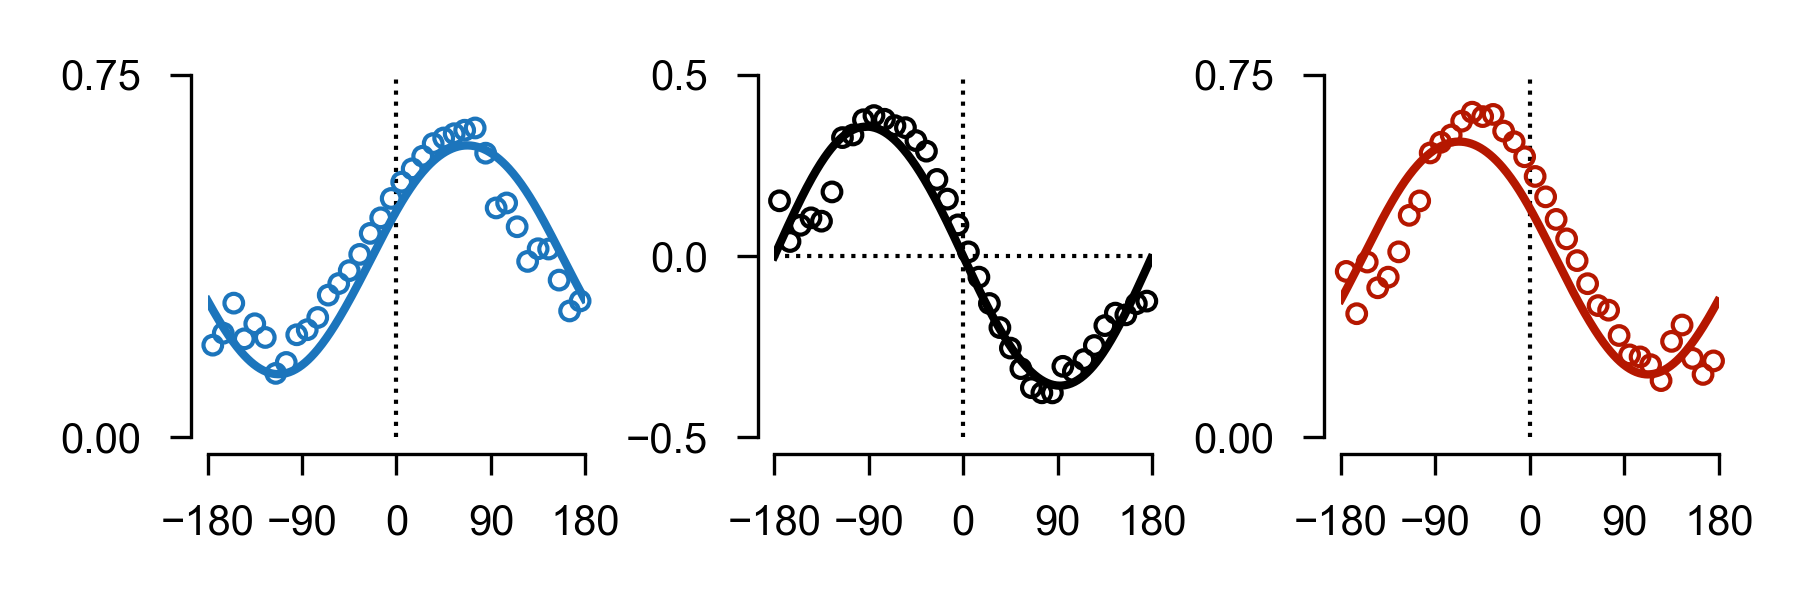

In [24]:
reload(pi)
pi.plot_lal_vs_distance_to_goal_model(lal_mean_df,fit_path=MODEL_FIT_CSV_PATH,
                                      save=save_figure,
                                      savepath=FIGURE_PATH,
                                      fname='ED_Fig_9e.pdf'
                                      )

### Menotaxis bouts 

genotype
57C10-AD-VT037220-DBD    10
dtype: int64
114  bouts


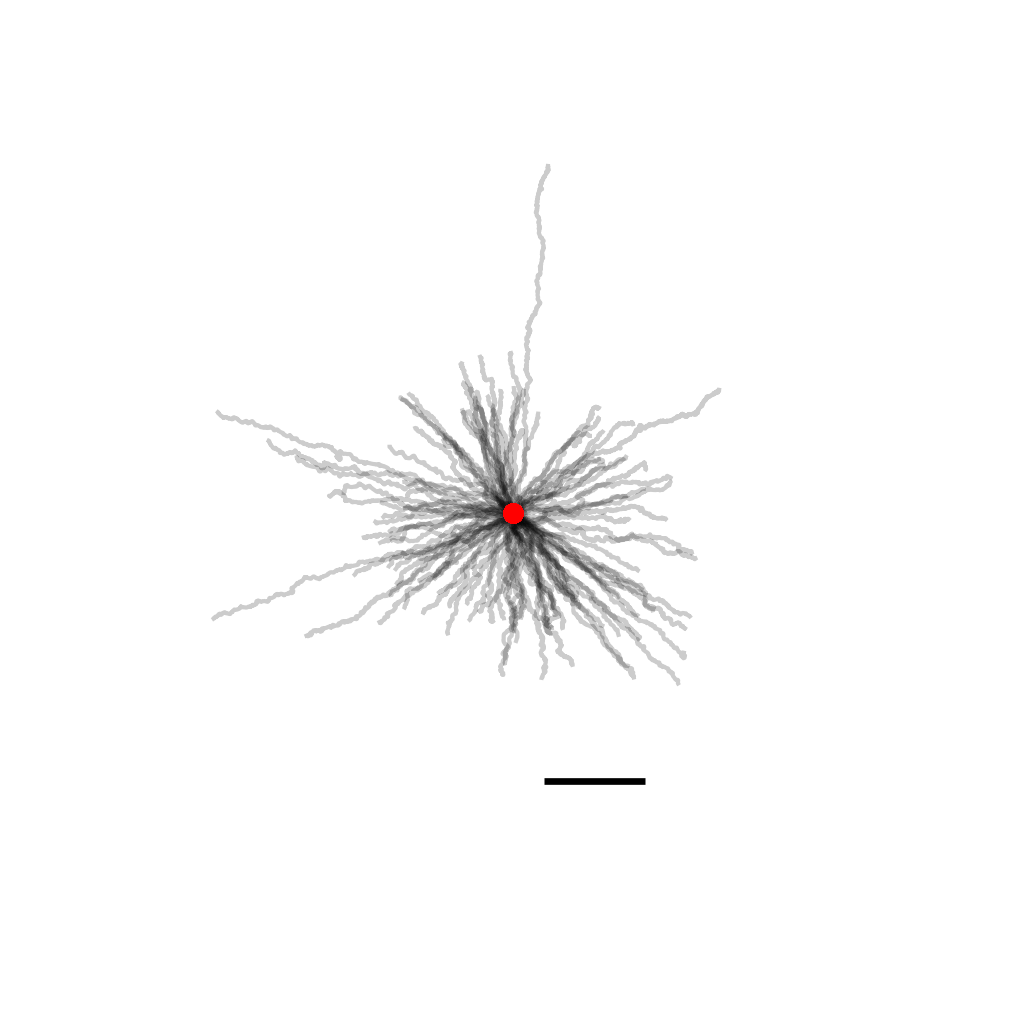

In [25]:
reload(bh)
bh.plot_fixation_bouts_ed(abf_fixation_df,
                           save=save_figure,
                          savepath=FIGURE_PATH,
                          fname='ED_Fig_2e_pfl3_im_lal.pdf')

In [26]:
reload(pi)
menotaxis_bouts_raster_df,summary_menotaxis_df=pi.get_menotaxis_bouts_raster_and_goals(recs,
                                                                                      save=save_source_data,
                                                                                      savepath=SOURCE_DATA_PATH,
                                                                                      fname='ED_Fig_2f_pfl3_lal_im.csv')

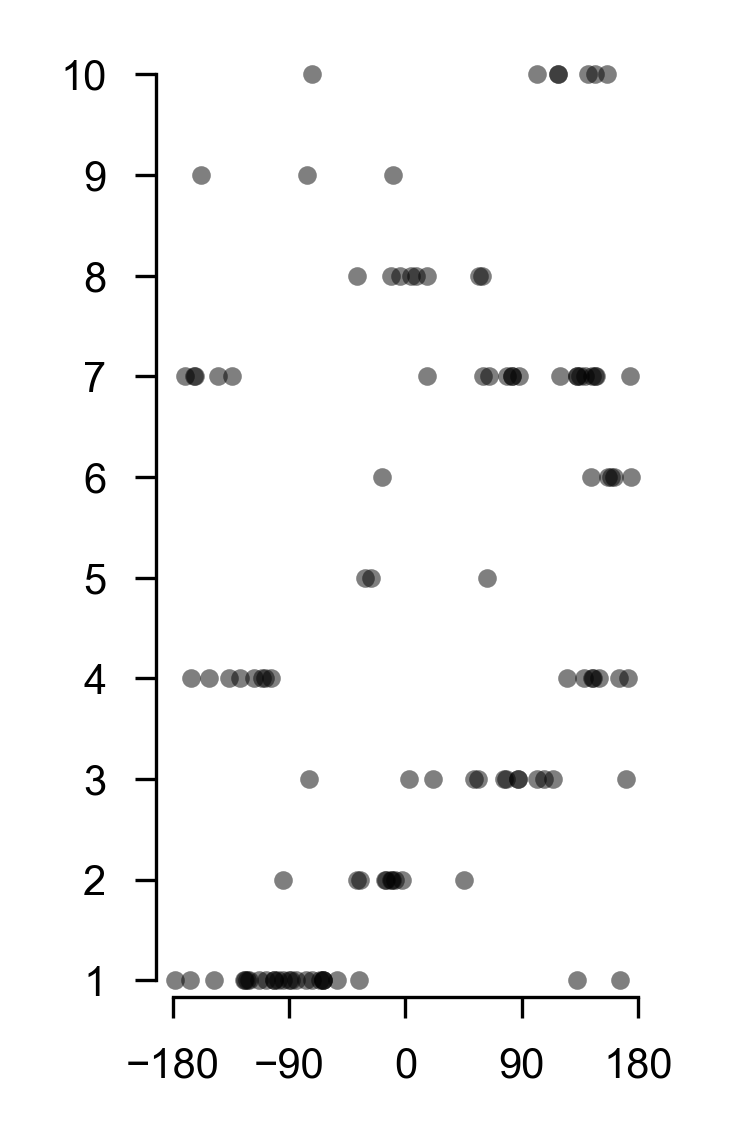

In [27]:
reload(bh)
bh.plot_menotaxis_bout_anlges(summary_menotaxis_df,
                              save=save_figure,
                              savepath=FIGURE_PATH,
                             fname='ED_Fig_2f_pfl3_lal_im.pdf')

### Behaviour characterization (ED Fig. 2i)
We re-process trials, this is for the purpose of showing behaviour

In [28]:
reload(bh)
abf_trials_df_ed=bh.get_trials(recs,pad_s=60,stimid_map= {'+90 jump':[9,11],
              '-90 jump':[5,8],
              'CL_bar':[-1,4]
              },bar_jump_duration_s=2,im=False)

In [29]:
reload(bh)
selected_trials_df=bh.get_selected_trials(abf_trials_df_ed,criteria='std_before<45')

fraction of valid trials: 0.7388888888888889


In [30]:
reload(bh)
mean_trial_fly_df,trial_fly_df=bh.get_mean_goal_diff(selected_trials_df,
                                                     save=save_source_data,
                                                    savepath=SOURCE_DATA_PATH,
                                                    fname='ED_Fig_2i_pfl3_lal_im.csv')

Total flies:
 trial_type
-90 jump    10
+90 jump    10
dtype: int64


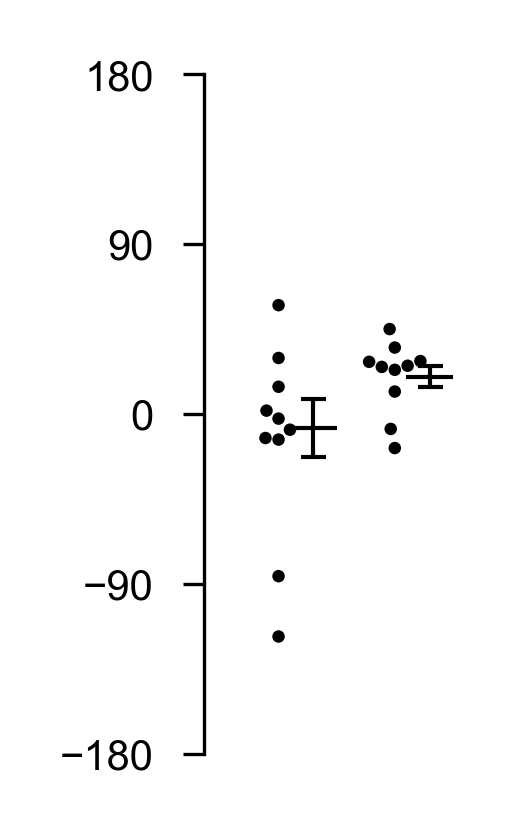

In [31]:
reload(bh)
bh.plot_goal_diff(mean_trial_fly_df,trial_fly_df, 
                  save=save_figure,
                  savepath=FIGURE_PATH,
                  fname='ED_Fig_2i_pfl3_lal_im.pdf')

### Mean R-L activity during bar jumps (ED Fig. 9i)

In [32]:
reload(pi)
abf_trials_df, im_trials_df=pi.get_bar_jump_trials(recs)

In [33]:
reload(pi)
rml_dheading_during=pi.get_rml_heading_during_bar_jumps(abf_trials_df,
                                                       save=save_source_data,
                                                       savepath=SOURCE_DATA_PATH,
                                                       fname='ED_Fig_9i.csv'
                                                       )

0.5685420302259753
0.8646700644813697


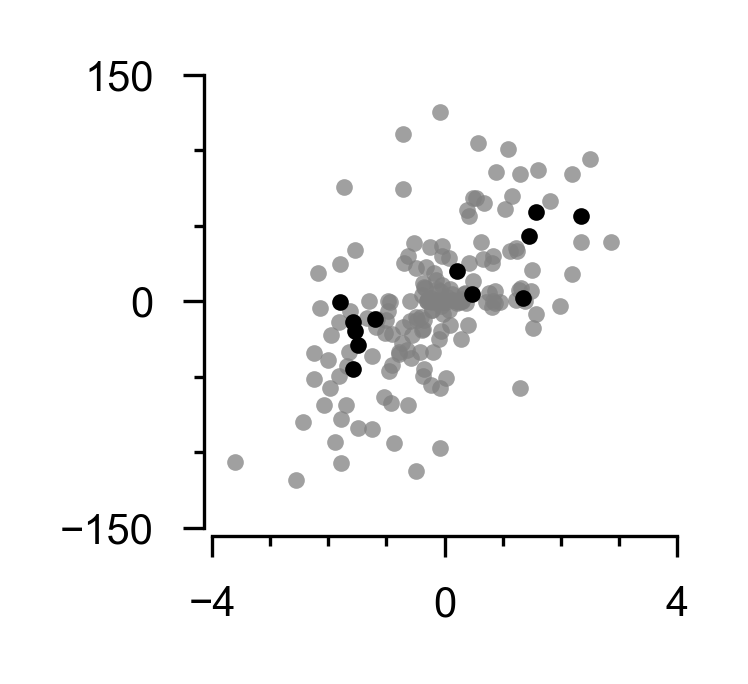

In [34]:
reload(pi)
pi.plot_rml_vs_turning_bar_jumps(rml_dheading_during,
                                 save=save_figure,
                                savepath=FIGURE_PATH,
                                fname='ED_Fig_9i.pdf')

# Save processed data

In [38]:
PROCESSED_DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/shared_data/PFL3_LAL_imaging/'

In [45]:
reload(pi)
pi.save_processed_data(PROCESSED_DATA_PATH,recs)